# descriptive.ipynb

This notebook calculated descriptive statistics in detail. The main notebook reports just a summary.

The `display_summary_table` and `plot_descriptive` functions below are called from the main notebook.

<br>
<br>

In [45]:
from IPython.display import display,Markdown #,HTML
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd


def display_title(s, pref='Figure', num=1, center=False):
    ctag = 'center' if center else 'p'
    s    = f'<{ctag}><span style="font-size: 1.2em;"><b>{pref} {num}</b>: {s}</span></{ctag}>'
    if pref=='Figure':
        s = f'{s}<br><br>'
    else:
        s = f'<br><br>{s}'
    display( Markdown(s) )



Below the previously developed `parse_data.ipynb` notebook is run. See that notebook for details.

In [46]:
%run parse_data.ipynb

df.describe()

,studytime,absences,health,medu,fedu,grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,2.035443,5.708861,3.554430,2.749367,2.521519,10.415190
std,0.839240,8.003096,1.390303,1.094735,1.088201,4.581443
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,3.000000,2.000000,2.000000,8.000000
50%,2.000000,4.000000,4.000000,3.000000,2.000000,11.000000
75%,2.000000,8.000000,5.000000,4.000000,3.000000,14.000000
max,4.000000,75.000000,5.000000,4.000000,4.000000,20.000000


To create a custom display of descriptive statistics, let's first define functions that will calculate central tendency and dispersion metrics.

Refer also to [this notebook](https://github.com/0todd0000/OpenBook-DataAnalysisPracticeInPythonAndJupyter/blob/master/Lessons/Lesson04/5-Examples/DescriptiveStatsExamples.ipynb) for details regarding how create custom descriptive statistics tables.

In [47]:
def central(x, print_output=True):
    x0     = np.mean( x )
    x1     = np.median( x )
    x2     = stats.mode( x ).mode
    return x0, x1, x2


def dispersion(x, print_output=True):
    y0 = np.std( x ) # standard deviation
    y1 = np.min( x )  # minimum
    y2 = np.max( x )  # maximum
    y3 = y2 - y1      # range
    y4 = np.percentile( x, 25 ) # 25th percentile (i.e., lower quartile)
    y5 = np.percentile( x, 75 ) # 75th percentile (i.e., upper quartile)
    y6 = y5 - y4 # inter-quartile range
    return y0,y1,y2,y3,y4,y5,y6

<br>

Let's now assemble and display a central tendency table:

</br>

In [48]:
def display_central_tendency_table(num=1):
    display_title('Central tendency summary statistics.', pref='Table', num=num, center=False)
    df_central = df.apply(lambda x: central(x), axis=0)
    round_dict = {'studytime': 3, 'absences': 3, 'health': 3, 'medu': 3, 'fedu': 3, 'grade': 3}
    df_central = df_central.round( round_dict )
    row_labels = 'mean', 'median', 'mode'
    df_central.index = row_labels
    display( df_central )

display_central_tendency_table(num=1)

<br><br><p><span style="font-size: 1.2em;"><b>Table 1</b>: Central tendency summary statistics.</span></p>

,studytime,absences,health,medu,fedu,grade
mean,2.035,5.709,3.554,2.749,2.522,10.415
median,2.000,4.000,4.000,3.000,2.000,11.000
mode,2.000,0.000,5.000,4.000,2.000,10.000


<br>

Let's repeat for a dispersion table:

</br>

In [49]:
def display_dispersion_table(num=1):
    display_title('Dispersion summary statistics.', pref='Table', num=num, center=False)
    round_dict = {'studytime': 3, 'absences': 3, 'health': 3, 'medu': 3, 'fedu': 3, 'grade': 3}
    df_dispersion         = df.apply(lambda x: dispersion(x), axis=0).round( round_dict )
    row_labels_dispersion = 'st.dev.', 'min', 'max', 'range', '25th', '75th', 'IQR'
    df_dispersion.index   = row_labels_dispersion
    display( df_dispersion )

display_dispersion_table(num=2)


<br><br><p><span style="font-size: 1.2em;"><b>Table 2</b>: Dispersion summary statistics.</span></p>

,studytime,absences,health,medu,fedu,grade
st.dev.,0.838,7.993,1.389,1.093,1.087,4.576
min,1.000,0.000,1.000,0.000,0.000,0.000
max,4.000,75.000,5.000,4.000,4.000,20.000
range,3.000,75.000,4.000,4.000,4.000,20.000
25th,1.000,0.000,3.000,2.000,2.000,8.000
75th,2.000,8.000,5.000,4.000,3.000,14.000
IQR,1.000,8.000,2.000,2.000,1.000,6.000


Let's save the variables in easier-to-use variable names:

In [50]:
y    = df['grade']
studytime = df['studytime']
absences = df['absences']
health = df['health']
medu = df['medu']
fedu = df['fedu']

Let's create scatterplots for the DV (quality) vs. each of the three IVs (acid, density, sugar):

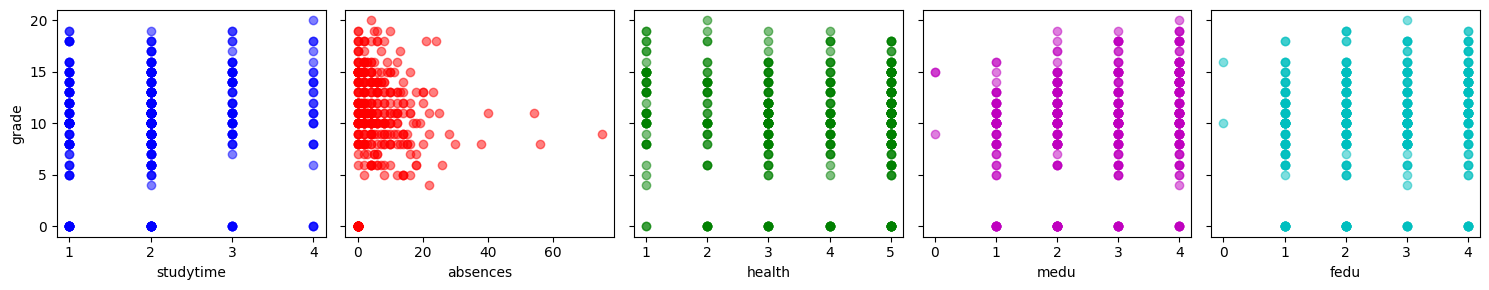

In [51]:

fig,axs = plt.subplots( 1, 5, figsize=(15,3), tight_layout=True )
axs[0].scatter( studytime, y, alpha=0.5, color='b' )
axs[1].scatter( absences, y, alpha=0.5, color='r' )
axs[2].scatter( health, y, alpha=0.5, color='g' )
axs[3].scatter( medu, y, alpha=0.5, color='m' )
axs[4].scatter( fedu, y, alpha=0.5, color='c' )

xlabels = 'studytime', 'absences', 'health', 'medu', 'fedu'
[ax.set_xlabel(s) for ax,s in zip(axs,xlabels)]
axs[0].set_ylabel('grade')
[ax.set_yticklabels([])  for ax in axs[1:]]
plt.show()

Next let's add regression lines and correlation coefficients to each plot:

In [52]:
def corrcoeff(x, y):
    r = np.corrcoef(x, y)[0,1]
    return r

def plot_regression_line(ax, x, y, **kwargs):
    a,b   = np.polyfit(x, y, deg=1)
    x0,x1 = min(x), max(x)
    y0,y1 = a*x0 + b, a*x1 + b
    ax.plot([x0,x1], [y0,y1], **kwargs)


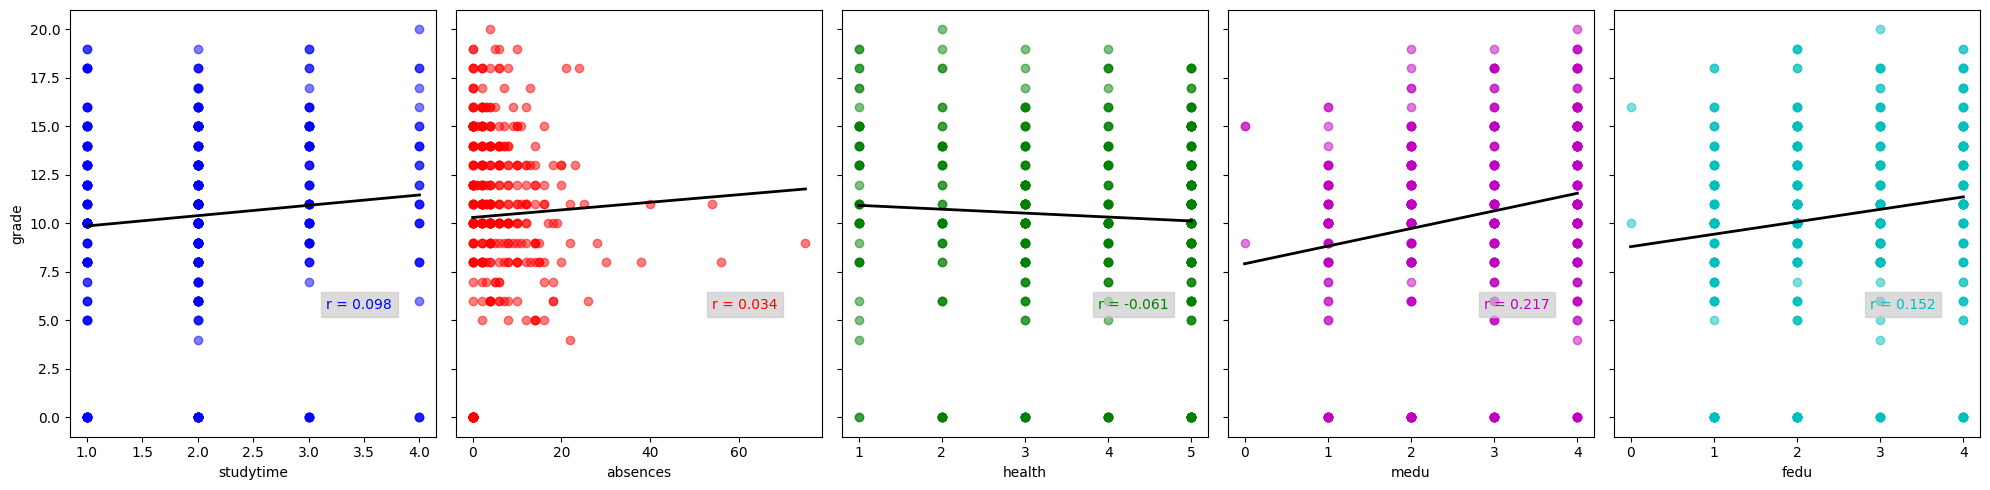

In [53]:
    
fig,axs = plt.subplots( 1, 5, figsize=(20,5), tight_layout=True )
ivs     = [studytime, absences, health, medu, fedu]
colors  = 'b', 'r', 'g', 'm', 'c'
for ax,x,c in zip(axs, ivs, colors):
    ax.scatter( x, y, alpha=0.5, color=c )
    plot_regression_line(ax, x, y, color='k', ls='-', lw=2)
    r   = corrcoeff(x, y)
    ax.text(0.7, 0.3, f'r = {r:.3f}', color=c, transform=ax.transAxes, bbox=dict(color='0.8', alpha=0.7))

xlabels = 'studytime', 'absences', 'health', 'medu', 'fedu'
[ax.set_xlabel(s) for ax,s in zip(axs,xlabels)]
axs[0].set_ylabel('grade')
[ax.set_yticklabels([])  for ax in axs[1:]]
plt.show()

The correlation coefficients are all relatively low, suggesting no clear linear correlation between the DV and IVs.

However, in the absences data (the 2 from left panel above) it appears that there may be opposite trends for low-grade students (grade <= 10) and high-grade students (grade > 10).  Let's plot grade vs. absences separately for the low- and high-grade groups, along with linear regression trends.

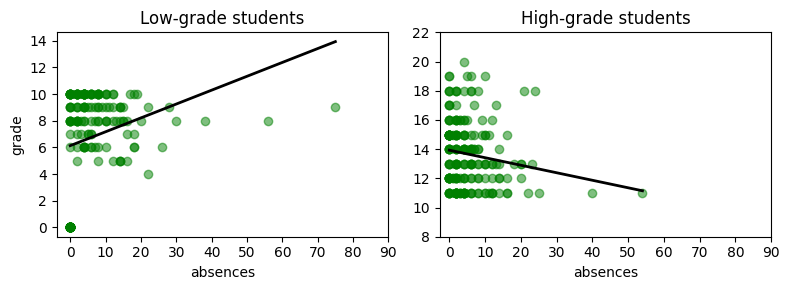

In [54]:
i_low     = y <= 10
i_high    = y > 10

fig,axs = plt.subplots( 1, 2, figsize=(8,3), tight_layout=True )
i       = [absences]
for ax,i in zip(axs, [i_low, i_high]):
    ax.scatter( absences[i], y[i], alpha=0.5, color='g' )
    plot_regression_line(ax, absences[i], y[i], color='k', ls='-', lw=2)
[ax.set_xlabel('absences')  for ax in axs] 
axs[0].set_title('Low-grade students')
axs[0].set_ylabel('grade')
axs[0].set_yticks(np.arange(0,16,2))
axs[0].set_xticks(np.arange(0, 95, 10))
axs[1].set_yticks(np.arange(8,24,2))
axs[1].set_xticks(np.arange(0, 95, 10))
axs[1].set_title('High-grade students')
plt.show()

The linear trend lines in the figures above appear to be opposite to the visual patterns:

- Grade appears to increase with absences in low-grade students
- Grade appears to descrease with absences in high-grade students

Linear regression suggests that the average pattern is opposite. To see why let's highlight the average for each students grade.

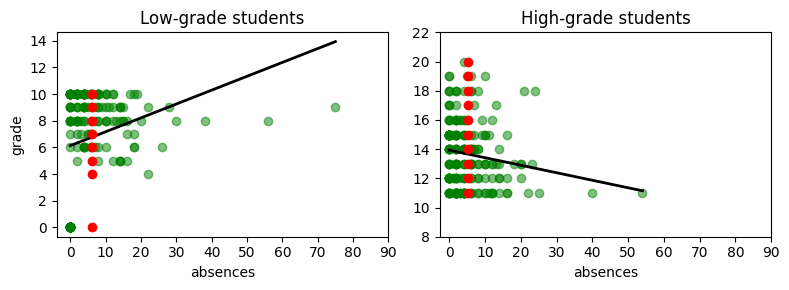

In [55]:
fig,axs = plt.subplots( 1, 2, figsize=(8,3), tight_layout=True )
for ax,i in zip(axs, [i_low, i_high]):
    ax.scatter( absences[i], y[i], alpha=0.5, color='g' )
    plot_regression_line(ax, absences[i], y[i], color='k', ls='-', lw=2)
[axs[0].plot(absences[i_low].mean(), q, 'ro')  for q in [0,4,5,6,7,8,9,10]]
[axs[1].plot(absences[i_high].mean(), q, 'ro')  for q in [11,12,13,14,15,16,17,18,19,20]]
[ax.set_xlabel('absences')  for ax in axs] 
axs[0].set_title('Low-grade students')
axs[0].set_ylabel('grade')
axs[0].set_yticks(np.arange(0,16,2))
axs[0].set_xticks(np.arange(0, 95, 10))
axs[1].set_yticks(np.arange(8,24,2))
axs[1].set_xticks(np.arange(0, 95, 10))
axs[1].set_title('High-grade students')
plt.show()


These analyses show that the trends associated with just the means are unclear.

Let's now assemble all results into a single figure for reporting purposes:

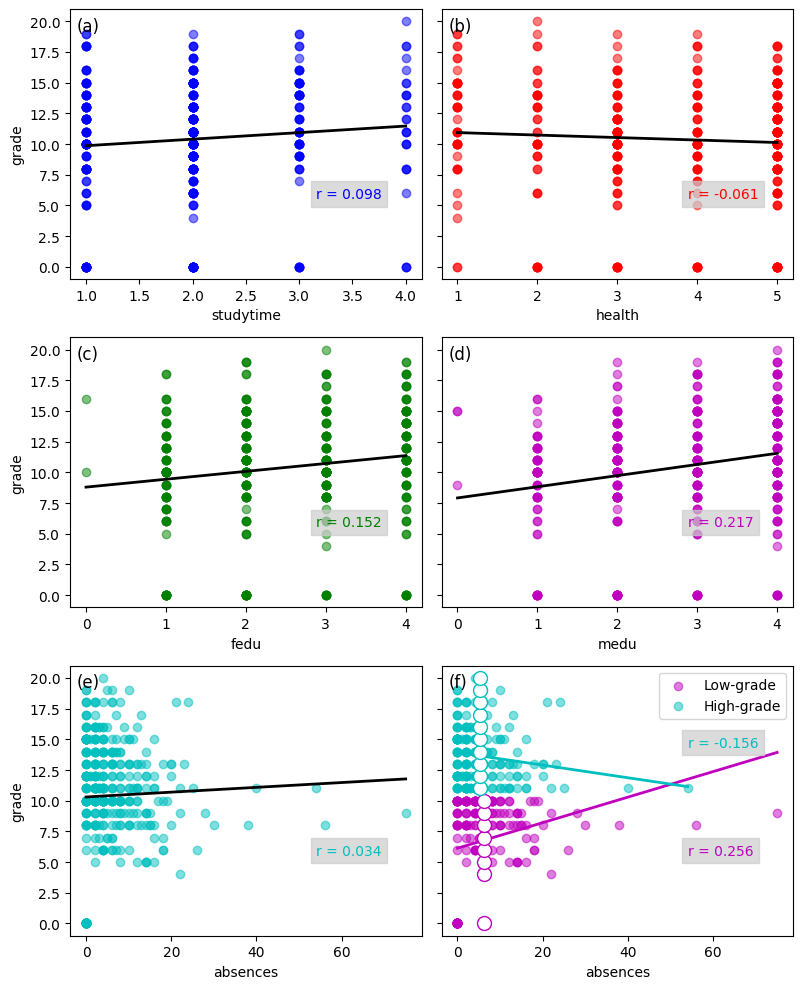

<p><span style="font-size: 1.2em;"><b>Figure 1</b>: Correlations amongst main variables.</span></p><br><br>

In [56]:
def plot_descriptive():
    
    fig,axs = plt.subplots( 3, 2, figsize=(8,10), tight_layout=True )
    ivs     = [studytime, health, fedu, medu, absences]
    colors  = 'b', 'r', 'g', 'm', 'c'
    for ax,x,c in zip(axs.ravel(), ivs, colors):
        ax.scatter( x, y, alpha=0.5, color=c )
        plot_regression_line(ax, x, y, color='k', ls='-', lw=2)
        r   = corrcoeff(x, y)
        ax.text(0.7, 0.3, f'r = {r:.3f}', color=c, transform=ax.transAxes, bbox=dict(color='0.8', alpha=0.7))

    xlabels = 'studytime', 'health', 'fedu', 'medu', 'absences'
    [ax.set_xlabel(s) for ax,s in zip(axs.ravel(),xlabels)]
    [ax.set_ylabel('grade') for ax in axs[:,0]]
    [ax.set_yticklabels([])  for ax in axs[:,1]]


    ax       = axs[2,1]
    i_low    = y <= 10
    i_high   = y > 10
    fcolors  = 'm', 'c'
    labels   = 'Low-grade', 'High-grade'
    q_groups = [[0,4,5,6,7,8,9,10], [11,12,13,14,15,16,17,18,19,20]]
    ylocs    = 0.3, 0.7
    for i,c,s,qs,yloc in zip([i_low, i_high], fcolors, labels, q_groups, ylocs):
        ax.scatter( absences[i], y[i], alpha=0.5, color=c, facecolor=c, label=s )
        plot_regression_line(ax, absences[i], y[i], color=c, ls='-', lw=2)
        [ax.plot(absences[i].mean(), q, 'o', color=c, mfc='w', ms=10)  for q in qs]
        r   = corrcoeff(absences[i], y[i])
        ax.text(0.7, yloc, f'r = {r:.3f}', color=c, transform=ax.transAxes, bbox=dict(color='0.8', alpha=0.7))

    ax.legend()
    ax.set_xlabel('absences')

    panel_labels = 'a', 'b', 'c', 'd', 'e', 'f'
    [ax.text(0.02, 0.92, f'({s})', size=12, transform=ax.transAxes)  for ax,s in zip(axs.ravel(), panel_labels)]
    plt.show()
    
    display_title('Correlations amongst main variables.', pref='Figure', num=1)

    
plot_descriptive()